In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, auc
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
sample_submission_df = pd.read_csv('/content/sample_submission.csv')

In [ ]:
train_df

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1


In [ ]:
input_shape = train_df.shape[1:][0]
print(input_shape)

24


In [ ]:
train_df.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

<Axes: xlabel='smoking', ylabel='count'>

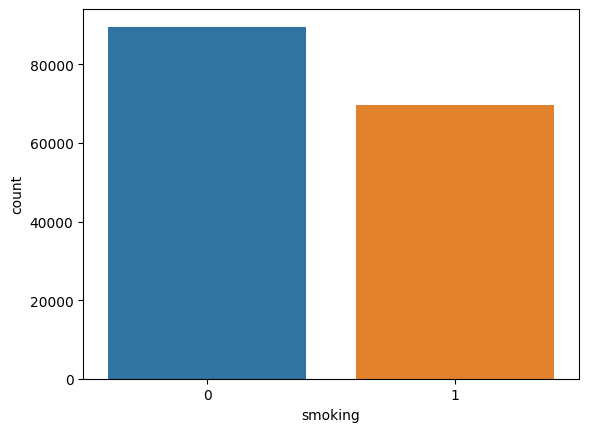

In [ ]:
sns.countplot(data=train_df, x='smoking')

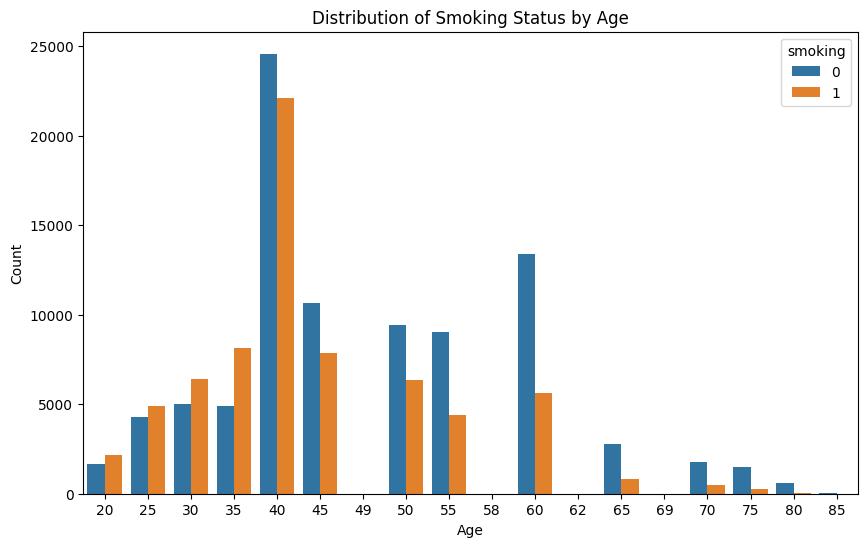

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='smoking', data=train_df)
plt.title('Distribution of Smoking Status by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [ ]:
print(train_df.columns)

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')


In [ ]:
y = train_df['smoking']
X = train_df.drop('smoking', axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[input_shape-1]),
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['AUC'],
)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    # verbose=0, # hide the output because we have so many epochs
)

Epoch 1/1000
209/209 [==============================] - 3s 13ms/step - loss: 1.1956 - auc: 0.5003 - val_loss: 0.7059 - val_auc: 0.5041
Epoch 2/1000
209/209 [==============================] - 1s 6ms/step - loss: 0.6985 - auc: 0.5006 - val_loss: 0.7117 - val_auc: 0.4969
Epoch 3/1000
209/209 [==============================] - 1s 5ms/step - loss: 0.7098 - auc: 0.5019 - val_loss: 0.6899 - val_auc: 0.4968
Epoch 4/1000
209/209 [==============================] - 1s 4ms/step - loss: 0.6955 - auc: 0.5025 - val_loss: 0.6919 - val_auc: 0.4967
Epoch 5/1000
209/209 [==============================] - 1s 5ms/step - loss: 0.6934 - auc: 0.5007 - val_loss: 0.6863 - val_auc: 0.5043
Epoch 6/1000
209/209 [==============================] - 1s 4ms/step - loss: 0.6914 - auc: 0.5008 - val_loss: 0.7049 - val_auc: 0.4961
Epoch 7/1000
209/209 [==============================] - 2s 7ms/step - loss: 0.6922 - auc: 0.4982 - val_loss: 0.6915 - val_auc: 0.4957
Epoch 8/1000
209/209 [==============================] - 1s 4m

In [ ]:
y_valid_pred = model.predict(X_valid)

1643/1643 [==============================] - 3s 2ms/step


In [ ]:
print(np.isnan(y_valid_pred).any())
print(pd.isnull(y_valid).any())

False
False


In [ ]:
y_valid_pred = np.nan_to_num(y_valid_pred, nan=0)

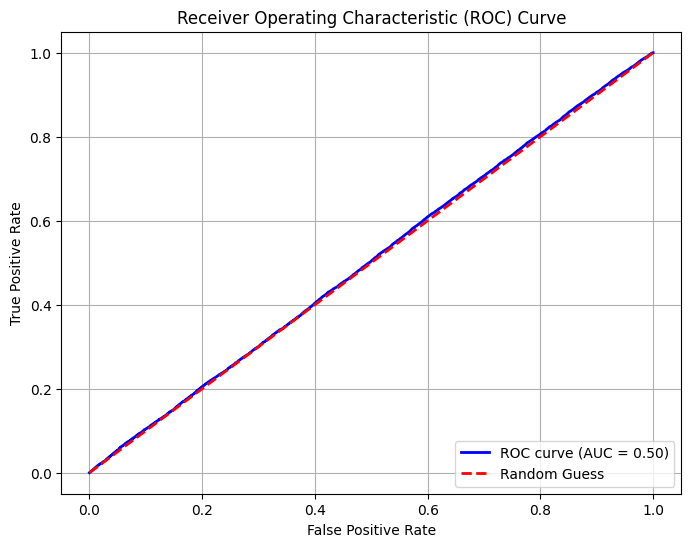

In [ ]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_pred)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
xgb_params = {
        'n_jobs': -1,
        'eval_metric': 'logloss',
        'objective': 'binary:logistic',
        'tree_method': 'hist',
        'verbosity': 1,
        'random_state': 42,
    }


xgb = XGBClassifier(**xgb_params)
xgb.fit(X_train, y_train)

# Predict probabilities
y_proba = xgb.predict_proba(X_valid)

# Get ROC AUC score
roc_auc = roc_auc_score(y_valid, y_proba[:,1])
print(f'ROC AUC score: {roc_auc:.4f}')

ROC AUC score: 0.8629


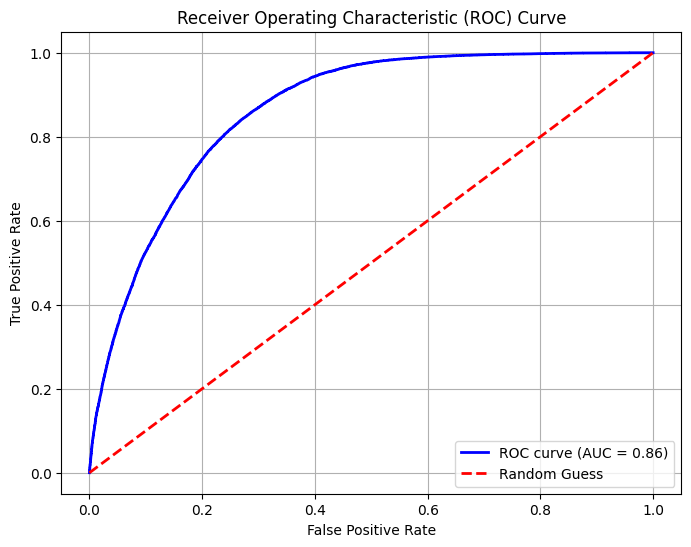

In [ ]:
fpr, tpr, thresholds = roc_curve(y_valid, y_proba[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

[0.00884409 0.02812183 0.5049218  0.01419501 0.01120786 0.00943399
 0.00817404 0.01753129 0.0118267  0.01275419 0.01077581 0.0104055
 0.01314332 0.02901439 0.01236267 0.0191338  0.1093547  0.01165234
 0.02765115 0.01416549 0.01496898 0.06405534 0.03630549]


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

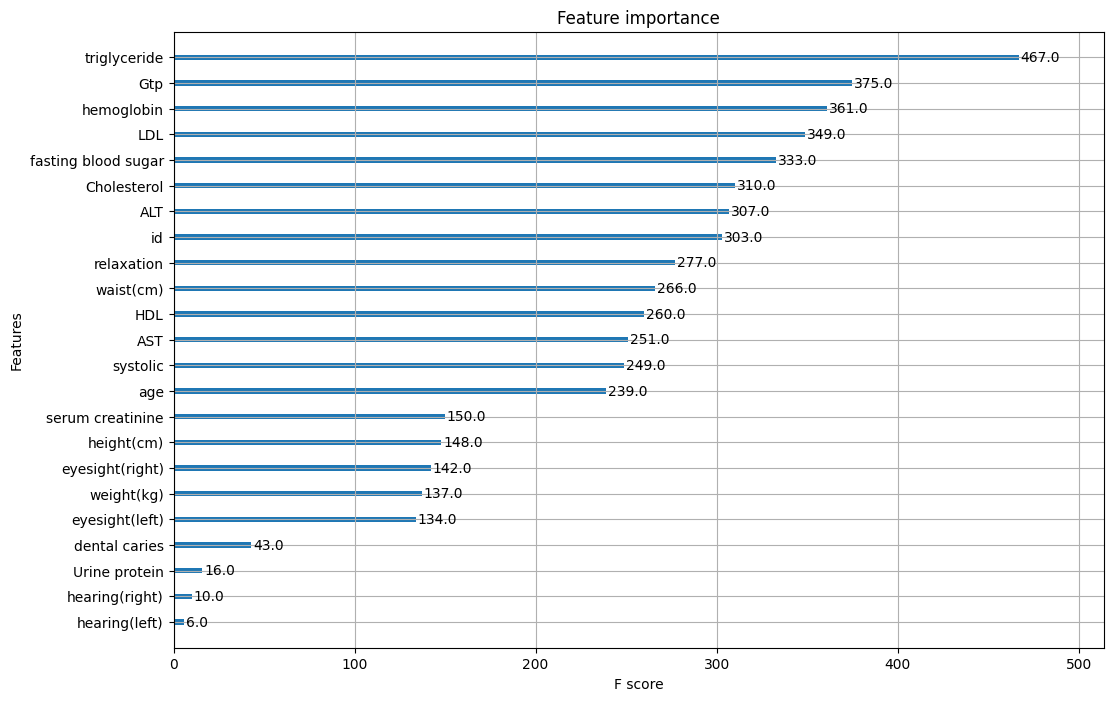

In [ ]:
print(xgb.feature_importances_)
from xgboost import plot_importance
# plot feature importance
fig, ax = plt.subplots(figsize=(12, 8))
plot_importance(xgb, ax=ax)

In [ ]:
#LGBMClassifier
lgbm_params = {
        'n_jobs': -1,
        'metric': 'logloss',
        'objective': 'binary',
        'verbosity': 1,
        'random_state': 42,
    }

lgbm = LGBMClassifier(**lgbm_params)
lgbm.fit(X_train, y_train)

# Predict probabilities
y_proba = lgbm.predict_proba(X_valid)

# Get ROC AUC score
roc_auc = roc_auc_score(y_valid, y_proba[:,1])
print(f'ROC AUC score: {roc_auc:.4f}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 46437, number of negative: 60264
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2370
[LightGBM] [Info] Number of data points in the train set: 106701, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.435207 -> initscore=-0.260638
[LightGBM] [Info] Start training from score -0.260638
ROC AUC score: 0.8636


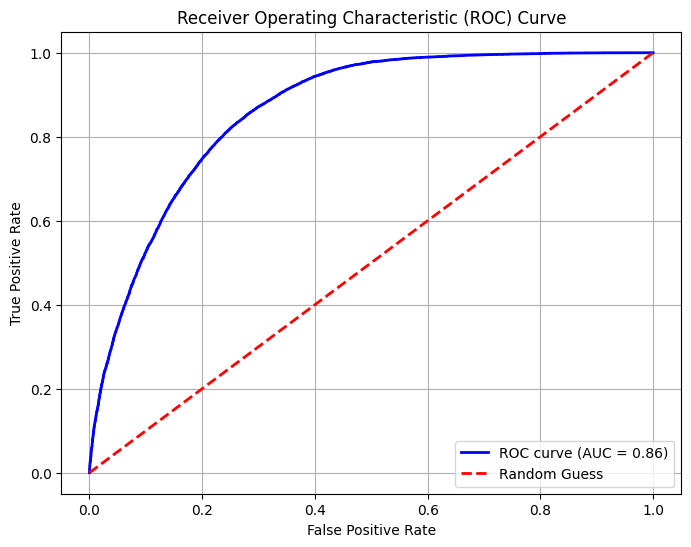

In [ ]:
fpr, tpr, thresholds = roc_curve(y_valid, y_proba[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
test_proba = xgb.predict(test_df)

In [ ]:
test_proba

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
test_data = pd.DataFrame(test_proba)
test_data['id'] = test_data.index
test_data.rename(columns={0:'smoking'}, inplace=True)

new_order = ['id', 'smoking']  # Specify the new order of columns
test_data = test_data.reindex(columns=new_order)

test_data

,id,smoking
0,0,1
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
106166,106166,1
106167,106167,0
106168,106168,0
106169,106169,0


In [ ]:
test_submission_file = test_data.to_csv('submission_file.csv', index=False)